# Autoencoder

### Importing Libraries

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Preparing Dataset

In [7]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Autoencoder Model

In [26]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 16

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               13328     
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


### Training

In [27]:
# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3197 - val_loss: 0.2625
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2477 - val_loss: 0.2323
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2185 - val_loss: 0.2115
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2004 - val_loss: 0.1974
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1870 - val_loss: 0.1869


### Evaluation

In [28]:
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s 15us/step

Summary: Loss over the test dataset: 0.18


### Visualize the reconstruction

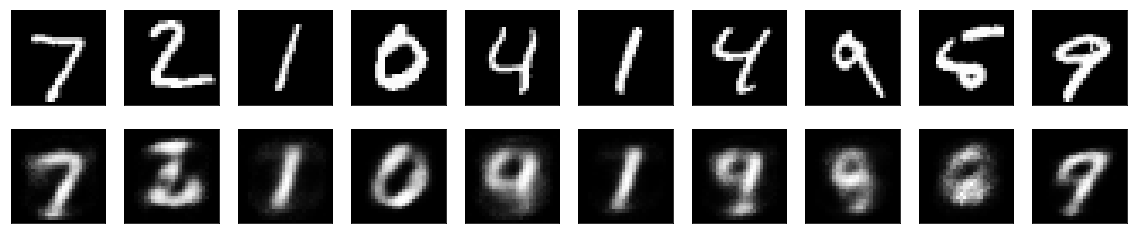

In [29]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of First Layer (784, 16)
Visualization of First Layer


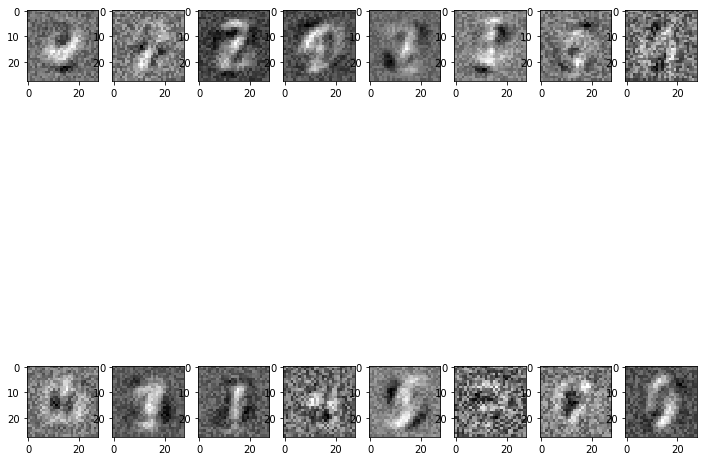

In [31]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables 
* This representation is similar to that of MLP
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

## Lets increase the number of hidden nodes

In [38]:
nb_hidden = 128

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2936 - val_loss: 0.2360
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2096 - val_loss: 0.1980
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1805 - val_loss: 0.1788
Epoch 4/5
60000/60000 [===============

### Visualize the reconstruction

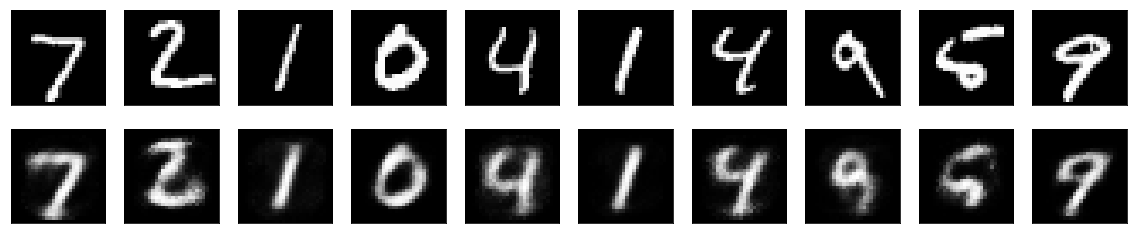

In [39]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of First Layer (784, 128)
Visualization of First Layer


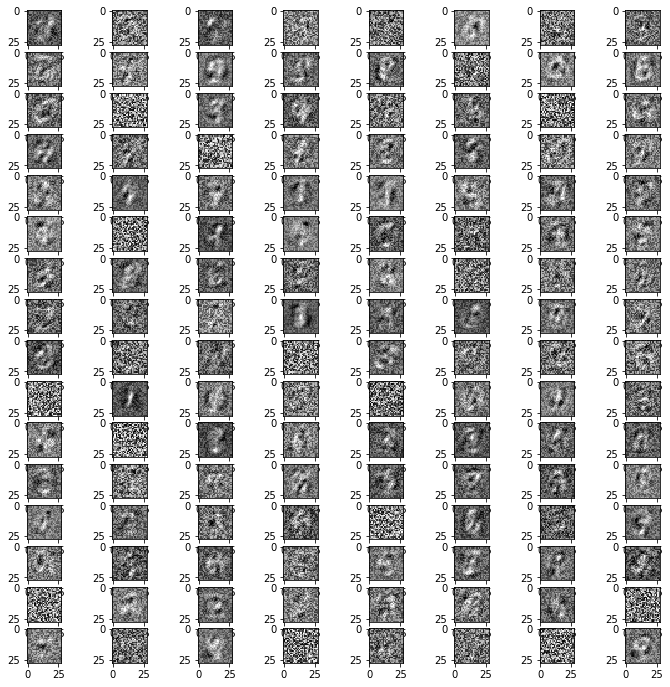

In [40]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

## Lets go for sparse!

In [41]:
nb_hidden = 1024

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_20 (Dense)             (None, 784)               803600    
Total params: 1,607,440
Trainable params: 1,607,440
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.2579 - val_loss: 0.2061
Epoch 2/5
60000/60000 [==============================] - 18s 296us/step - loss: 0.1780 - val_loss: 0.1733
Epoch 3/5
60000/60000 [==============================] - 18s 299us/step - loss: 0.1528 - val_loss: 0.1564
Epoch 4/5
60000/60000 [=====

### Visualize the reconstruction

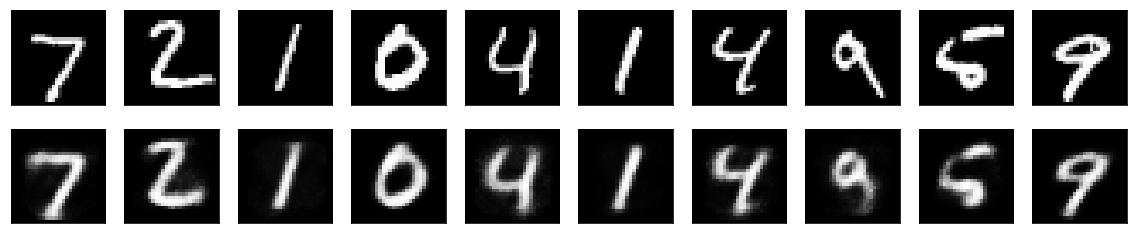

In [45]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 128)
Visualization of first 128 nodes in the Hidden Layer


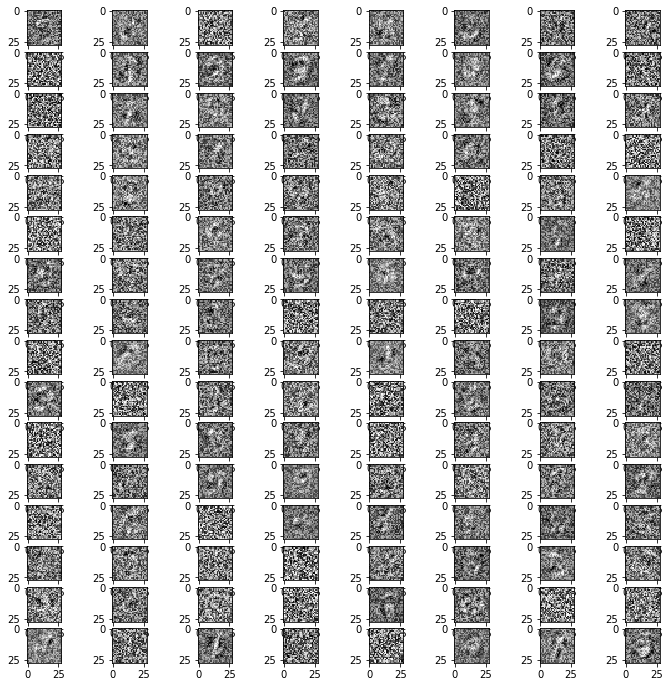

In [44]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)
    
nb_show = 128 
layer = np.array(w[1][0])
layer1 = layer[:,0:nb_show]
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of first",nb_show,"nodes in the Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_show/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()